# Workflow
-----------------------------
1. Read image.
2. Read label given in the model.
3. Read Model weights.
4. Read Model configuration.
5. Resize image to reduce number of pixels keeping aspect ratio.
6. Convert it to blob (required for input to the model).
7. Set blob as input to the model.
8. Predict from model using tuple unpacking in variables box and mask(here we dont need mask) using net.forward().
9. Put box on image
10. Resize the detected image to its original dimension(if you want)

#### https://www.learnopencv.com/deep-learning-based-object-detection-and-instance-segmentation-using-mask-r-cnn-in-opencv-python-c/

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def imshow(img):
    plt.imshow(img, cmap='gray')

In [3]:
img = cv2.imread(r'billgates.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

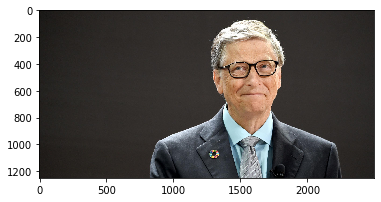

In [4]:
imshow(img)

In [5]:
labelpath = r'E:\dev\to_be_uploaded\opencv-instance-segmentation\mask-rcnn-coco\object_detection_classes_coco.txt'
with open(labelpath, 'r') as f:
    label = f.read().strip().split('\n')

In [6]:
configpath = r'E:\dev\to_be_uploaded\opencv-instance-segmentation\mask-rcnn-coco\mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'
weightpath = r'E:\dev\to_be_uploaded\opencv-instance-segmentation\mask-rcnn-coco\frozen_inference_graph.pb'

In [7]:
# loding model
net = cv2.dnn.readNetFromTensorflow(weightpath, configpath)

Choice of Interpolation Method for Resizing
-----------------------------------------------------------------------------------
1. cv2.INTER_AREA: This is used when we need need to shrink an image.
2. cv2.INTER_CUBIC: This is slow but more efficient.
3. cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique.
--------------------------------------------------------------------------------------

In [8]:
# Resizing by maintaing the aspect raio

def resize(image, width=None, height=None):
    (h, w) = image.shape[:2]
    
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_LINEAR)
    
    return resized

In [9]:
img = resize(img, width=300)

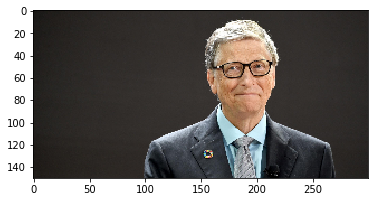

In [10]:
imshow(img)

https://stackoverflow.com/questions/37689423/convert-between-nhwc-and-nchw-in-tensorflow

In [11]:
# Blobs are the type of inputs for model and it returns a 4-D matrix with NCHW dimensions order. 
# N - Number of image in the batch
# C - Channel
# H - Height of image
# W - Width of image
blob = cv2.dnn.blobFromImage(img, swapRB=False, crop=False)

In [12]:
blob.shape

(1, 3, 150, 300)

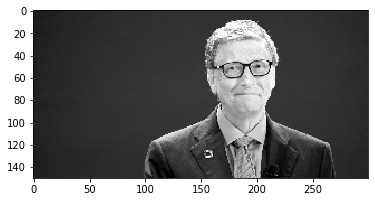

In [13]:
imshow(blob[0, 0, :, :]) # Red channel

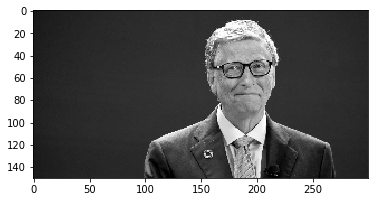

In [14]:
imshow(blob[0, 1, :, :]) # Blue channel

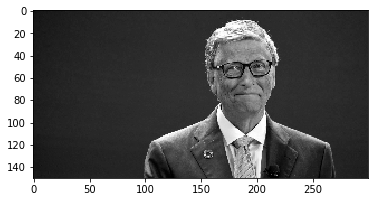

In [15]:
imshow(blob[0, 2, :, :]) # Green Channel

In [16]:
net.setInput(blob) # Setting input for the model

The blob is then passed in to the network as its input and a forward pass is run to get a list of predicted bounding boxes and the object masks from the output layers named as ‘detection_out_final‘ and ‘detection_masks‘ in the network.

box cordinates = left, top, right and bottom locations of the bounding box of the detected object in the frame

the top scoring 100 detection boxes are processed by the mask prediction branch. So, with 100 ROIs and 90 object classes, the mask prediction part of the network outputs a 4D tensor of size 100x90x15x15, where each mask is of size 15×15.

In [17]:
# Box is a 4 dimension matrix having - 
# [NotKnown, thisframe, NumberOfDetectionMade, [classID, class score, probability, x_cordOfBox,y_cordOfBox, heightOfBox, widthOfBox]]
# 4th dimension have 7 dimension written above and you can also call "probability" as 'confidence'
# https://www.youtube.com/watch?v=MIfPu4RxfLw

# What is NumberOfDetectionMade?

box, mask = net.forward(["detection_out_final","detection_masks"])

In [18]:
box.shape

(1, 1, 100, 7)

In [19]:
mask.shape

(100, 90, 15, 15)

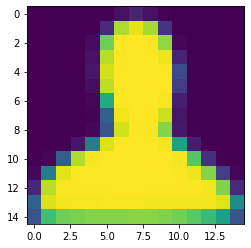

In [20]:
plt.imshow(mask[0,0,:,:])

In [21]:
H = img.shape[0]
W = img.shape[1]
img.shape

(150, 300, 3)

In [22]:
left, top, right, bottom = box[0, 0, 0, 3:7]*(W, H, W, H)
box[0, 0, 0, 3:7]

# 0 - Not Known     
# 0  - This image   
# 0 - Person
# 3:7 - left, top, right and bottom locations of the bounding box

# Left or Right means width
# Top or Bottom means height

array([0.33608747, 0.07840818, 0.91582966, 1.        ], dtype=float32)

In [23]:
left, top, right, bottom = int(left), int(top), int(right), int(bottom)

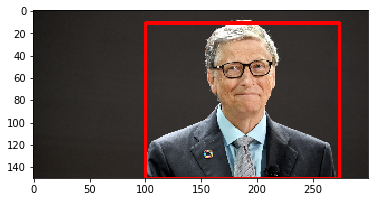

In [24]:
detected = cv2.rectangle(img=img.copy(), pt1=(left,top), pt2=(right, bottom), color=(255,0,0), thickness=2)
imshow(detected)

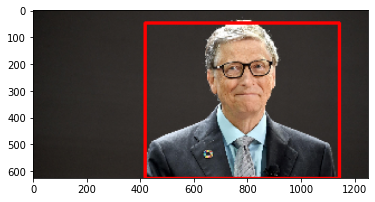

In [26]:
# Rescale image to original size

imshow(resize(detected, width=1250))